In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

plt.style.use('ggplot')

In [19]:
from sklearn.datasets import load_boston
boston = load_boston()

In [21]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [22]:
feature_df = pd.DataFrame(data=boston['data'], columns=boston['feature_names'])

In [23]:
target = pd.Series(data=boston['target'], name='target')

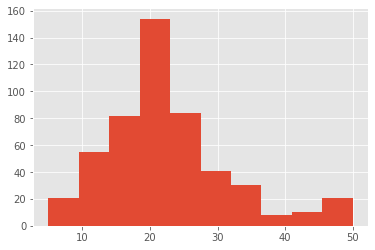

In [24]:
_ = target.hist()

In [25]:
feature_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [33]:
from tpot import TPOTRegressor


regressor = TPOTRegressor(generations=5, 
                          population_size=50, 
                          verbosity=2, 
                          n_jobs=4,
                          random_state=42, 
                          template='Regressor')

regressor.fit(feature_df.values, target.values)

Generation 1 - Current best internal CV score: -20.164673087731806
Generation 2 - Current best internal CV score: -20.164673087731806
Generation 3 - Current best internal CV score: -18.810523582154456
Generation 4 - Current best internal CV score: -18.810523582154456
Generation 5 - Current best internal CV score: -18.810523582154456

Best pipeline: GradientBoostingRegressor(input_matrix, alpha=0.9, learning_rate=0.1, loss=lad, max_depth=7, max_features=0.3, min_samples_leaf=10, min_samples_split=3, n_estimators=100, subsample=0.7500000000000001)


TPOTRegressor(config_dict=None, crossover_rate=0.1, cv=5,
              disable_update_check=False, early_stop=None, generations=5,
              max_eval_time_mins=5, max_time_mins=None, memory=None,
              mutation_rate=0.9, n_jobs=4, offspring_size=None,
              periodic_checkpoint_folder=None, population_size=50,
              random_state=42, scoring=None, subsample=1.0,
              template='Regressor', use_dask=False, verbosity=2,
              warm_start=False)

In [36]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split

In [35]:
m = regressor.export()
print(m)

import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
features = tpot_data.drop('target', axis=1)
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'], random_state=42)

# Average CV score on the training set was: -18.810523582154456
exported_pipeline = GradientBoostingRegressor(alpha=0.9, learning_rate=0.1, loss="lad", max_depth=7, max_features=0.3, min_samples_leaf=10, min_samples_split=3, n_estimators=100, subsample=0.7500000000000001)
# Fix random state in exported estimator
if hasattr(exported_pipeline, 'random_state'):
    setattr(exported_pipeline, 'random_state', 42)

exported_pipeline.fit(training_features, training_target)
results = exported_p

In [37]:
exported_pipeline = GradientBoostingRegressor(
    alpha=0.9, learning_rate=0.1, 
    loss="lad", max_depth=7, max_features=0.3, min_samples_leaf=10, min_samples_split=3, n_estimators=100, subsample=0.7500000000000001)


exported_pipeline.fit(feature_df.values, target.values)
results = exported_pipeline.predict(feature_df.values)

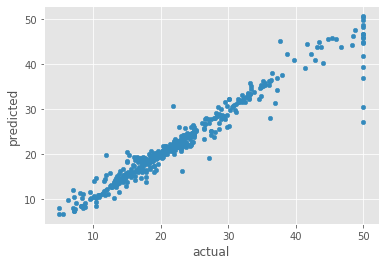

In [41]:
values = pd.DataFrame(data=np.column_stack([results, target.values]), columns=['predicted', 'actual'])
values.plot(kind='scatter', x='actual', y='predicted')